Understating the 2D Haar transform!

Motivation: 
- Given some signal, we want to separate out the (detials) from the general shape.
- One way to do this is some Fourier transform where we take the signal to the frequency domain. For the 1D signal this is no problem, but what happens when we go 2D?!
- Instead of relying on Fourier, there's a different way. We can try to decouple the high frequency signal from the underlying signal using the Haar Transform.

Upshots:
- Haar 2D does not throw away spatial information in 2D like Fourier.
- Haar is also totally invertible. In other words, we can take the Haar Transformed signal and use it to reconstruct the original!

Relationship to VAE: 
- When working with any kind of auto-encoder, the game is to have a model ingest an input sample X and reconstruct is as X'.
- The autoencoder take some input X and passes it through an information bottle neck and reconstructs the example as X'.
- We train the auto-encoder with an object which is usually some kind of meusurement on how close X and X' are.
- If we stick to the original signals, diff(X, X') may become dominated by low frequency components of the signal or overwhelmed by some other features.
- If instead, we take the Haar transform it is possible to more finely control how we compute diff(X, X') 

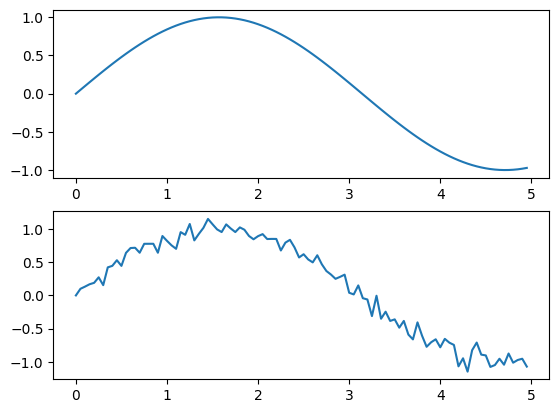

In [16]:
import jax.numpy as jnp
import jax.random as random
import jaxwt as jwt
import cv2
import matplotlib.pyplot as plt

key = random.key(42)

x_vals = jnp.array(range(0,100)) / 20.0
y_vals = jnp.sin(x_vals)

noise = random.normal(key, (100,)) / 10.0

fig, axs = plt.subplots(2,)
axs[0].plot(x_vals, y_vals)
axs[1].plot(x_vals, y_vals + noise)
plt.show()

In the above, we have some sinosoid and below we've added noise to it.

What we'll do now is take the 1D, level 1 Haar transform of the signal!

(Note: level 1 means apply the Haar transform to the orignal signal, level 2 would mean to apply the Haar again to the signal on the left. And you can keep going for however long you want such that the length of the input signal has at least 2 elements.)

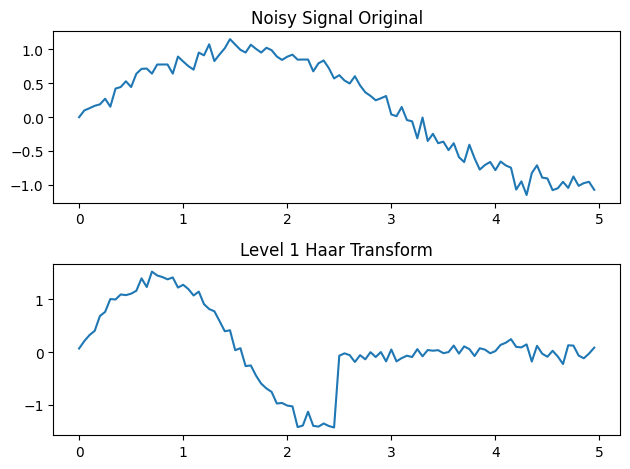

In [17]:
transformed = jwt.wavedec(y_vals + noise, "haar", level=1, mode="reflect")

fig, axs = plt.subplots(2,)
axs[0].plot(x_vals, y_vals + noise)
axs[1].plot(x_vals, jnp.concatenate([transformed[0], transformed[1]], axis=-1)[0])
axs[0].set_title('Noisy Signal Original')
axs[1].set_title('Level 1 Haar Transform')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.9999998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-59.499996..25.999998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-36.999996..40.499996].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-60.499992..5.9999995].


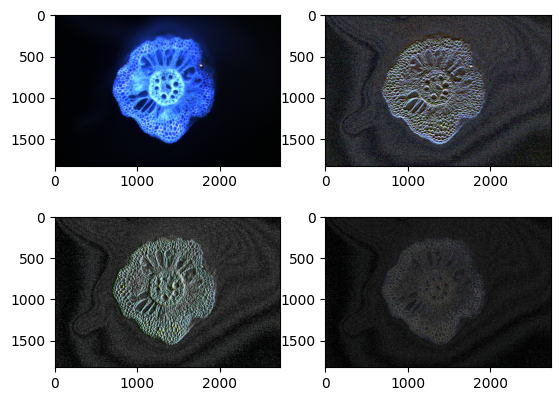

In [18]:
img_path = '/code/demo_data/Mo001.JPG'
img = jnp.array(cv2.imread(img_path), jnp.float32)[:, :, ::-1]

transformed = jwt.wavedec2(img, "haar", level=1, mode="reflect", axes=(0,1))

fig, axs = plt.subplots(2,2)
axs[0,0].imshow(transformed[0] / 255.)
axs[0,1].imshow(transformed[1][0])
axs[1,0].imshow(transformed[1][1])
axs[1,1].imshow(transformed[1][2])
plt.show()

There are 4 images generated by the 2D Haar transform and they are all 1/2 resolution! 

- top left: the crude image which should capture smoothed out contents
- the other three: are somehow capturing edges and textures within the image!

The upshot, we can now have a target for our VAE that treats the coarse, blurry image as one target and the textures as another target!